Author: Suju Krishnan

Program: XLRI Data Science Course for Executives

Aim: Program Assignment

Submission Date: 6th July 2020

Project Summary: I'm writing this project to firm-up my skills on Data Science using Python. I want to explore the areas of Data Extraction from multiple sources, Data Merging, Data Cleaning, Missing Data Addition, Plotting, Prediction.

Problem Statement: Predict how many beds will be required in each US state in the month of July 2020

Steps:
1. Get the US States COVID-19 Data
2. Get the number of beds in each state
3. Find out how many are COVID-19 dedicated beds
4. Map these two datasets, clean them
5. Plot different representations
6. Map on State
7. Predict how many beds would be required.Phase 2.

# Import and Load

Import the relavnt files

In [1]:
import numpy as np  #Import the NumPy Library as np
import pandas as pd #Import the Pandas Library as pd 
import matplotlib.pyplot as plt #Import the MatPlotLib as plt
import seaborn as sns #Import SeaBorn as sns
import statsmodels.api as sm
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Import the dataset

In [2]:


url = "https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties.csv"
covid_realtime = pd.read_csv(url) #Assign the Data to a DataFrom - Covid_Realtime

#StatePop = pd.read_excel(r"/sample_data/COVIDBedTracker.xlsx",sheet_name='Sheet1')
StatePop = pd.read_excel('sample_data/COVIDBedTracker.xlsx')
HospitalBeds = pd.read_excel('sample_data/HospitalBeds.xlsx')


Display the contents of COVID-19 Realtime US Data

We can see here that we have 248K+ Rows and 6 Columns

Also this HTML feature of the OutPut Provides only the first five rows and the last 5 rows

In [3]:
covid_realtime

,date,county,state,fips,cases,deaths
0,2020-01-21,Snohomish,Washington,53061.0,1,0
1,2020-01-22,Snohomish,Washington,53061.0,1,0
2,2020-01-23,Snohomish,Washington,53061.0,1,0
3,2020-01-24,Cook,Illinois,17031.0,1,0
4,2020-01-24,Snohomish,Washington,53061.0,1,0
...,...,...,...,...,...,...
270240,2020-06-25,Sweetwater,Wyoming,56037.0,73,0
270241,2020-06-25,Teton,Wyoming,56039.0,118,1
270242,2020-06-25,Uinta,Wyoming,56041.0,162,0
270243,2020-06-25,Washakie,Wyoming,56043.0,38,5


Display the contents of State Population XLS file

We can see here that we have 50 Rows and 186+ Columns

The Data we need is in Col 3 - Population

In [4]:
#StatePop

Display the contents of HospitalBeds Dataset

We can see here that we have 50 Rows and 4 Columns

The Data we need is in Col 4 - Hospital Beds

In [5]:
HospitalBeds


,country,Postal Abbrebations,Population,Hospital Beds
0,Alabama,AL,4903185,17537
1,Alaska,AK,731545,2034
2,Arizona,AZ,7278717,16342
3,Arkansas,AR,3017804,11149
4,California,CA,39512223,85604
5,Colorado,CO,5758736,12438
6,Connecticut,CT,3565278,8501
7,Delaware,DE,973764,2633
8,Florida,FL,21477737,60521
9,Georgia,GA,10617423,28928


# Check, Clean, Analyze

Check the data you imported for consistency, find out after check and clean if the data is ready for exploratory data analysis and visualization

Get more information about the dataset through the **info** method to get an understanding of the metadata

In [6]:
covid_realtime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270245 entries, 0 to 270244
Data columns (total 6 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    270245 non-null  object 
 1   county  270245 non-null  object 
 2   state   270245 non-null  object 
 3   fips    267420 non-null  float64
 4   cases   270245 non-null  int64  
 5   deaths  270245 non-null  int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 12.4+ MB


The function **Info** gives is some understanding of the missing data in the dataset. We see that Date, County, State, Cases and Deaths Data are complete. However fips data is incomplete

We use the DataFrame-->Describe method to get some more information of this dataset. This method returns summary stats on the numerical parts of our table.

We come to know the following
1. Count - Number of patients
2. Not able to make any sense of Mean, Standard Deviation, Min, 25%ile, Median and 75%tile

In [7]:
covid_realtime.describe()

,fips,cases,deaths
count,267420.000000,270245.000000,270245.000000
mean,30124.950213,438.733161,24.329135
std,15331.516948,3876.419984,344.265311
min,1001.000000,0.000000,0.000000
25%,18093.000000,6.000000,0.000000
50%,29071.000000,25.000000,0.000000
75%,45049.000000,120.000000,4.000000
max,56045.000000,218429.000000,21856.000000


Undestanding Non-Numeric Data. This would be Strings or Text mostly stored as Objects in Pandas

From this analysis we can understand that, we have data for 150 days and 55 States. 18th June was when there was top infections. The County where the infections was maximun as Washingtom and the state is Texas.

In [8]:
covid_realtime.describe(include = "O")

,date,county,state
count,270245,270245,270245
unique,157,1802,55
top,2020-06-25,Washington,Texas
freq,3060,2918,19474


Now Lets Describe the Hospital Bed Situation

Again, it looks like some cleaning is required...Not able to make anything here

Maybe on an avg there are 13K to 18K beds per state

In [9]:
HospitalBeds.describe()

,Population,Hospital Beds
count,5.000000e+01,50.000000
mean,6.550675e+06,18435.280000
std,7.389282e+06,18775.976488
min,5.787590e+05,1525.000000
25%,1.827712e+06,5237.750000
50%,4.558234e+06,13832.000000
75%,7.530849e+06,22846.250000
max,3.951222e+07,85604.000000


Now for the Hospital Beds Non-Numeric Data

Not sure what to make of this data either

In [10]:
HospitalBeds.describe(include = "O")

,country,Postal Abbrebations
count,50,50
unique,50,50
top,Colorado,CA
freq,1,1


In [11]:
#covid_realtime.mean() #checking if I can get the mean...It took a long time to load

In [12]:
HospitalBeds.mean().sort_values() #18K Beds on an avg + 6.5 Million Avg Pop per state

Hospital Beds      18435.28
Population       6550675.30
dtype: float64

Clean StatePop, the Row Index is c - It should be State

In [13]:
StatePop.rename(columns = {"c": "state"}, inplace = True)


In [14]:
#print(StatePop)

Clean HospitalBeds "country" to "state"

In [15]:
HospitalBeds.rename(columns = {"country": "state"}, inplace = True)

In [16]:
HospitalBeds['state'] = HospitalBeds['state'].astype(pd.StringDtype())
HospitalBeds.dtypes

state                  string
Postal Abbrebations    object
Population              int64
Hospital Beds           int64
dtype: object

Lets change some names

Massachusetts[E]	to Massachusetts

Kentucky[E] to Kentucky

Pennsylvania[E] to Pennsylvania

Rhode Island[F] to Rhode Island

Virginia[E] to Virginia

Converting the state from object datatype to string datatype

In [17]:
HospitalBeds['state'] = HospitalBeds['state'].replace({'Massachusetts[E]': 'Massachusetts'})
HospitalBeds['state'] = HospitalBeds['state'].replace({'Kentucky[E]': 'Kentucky'})
HospitalBeds['state'] = HospitalBeds['state'].replace({'Pennsylvania[E]': 'Pennsylvania'})
HospitalBeds['state'] = HospitalBeds['state'].replace({'Rhode Island[F]': 'Rhode Island'})
HospitalBeds['state'] = HospitalBeds['state'].replace({'Virginia[E]': 'Virginia'})

Cleanup continued

In [18]:
#HospitalBeds['state'] = HospitalBeds['state'].replace({'Kentucky[E]': 'Kentucky'})
#HospitalBeds['state'] = HospitalBeds['state'].replace({'Pennsylvania[E]': 'Pennsylvania'})
#HospitalBeds['state'] = HospitalBeds['state'].replace({'Rhode Island[F]': 'Rhode Island'})
#HospitalBeds['state'] = HospitalBeds['state'].replace({'Virginia[E]': 'Virginia'})

In [19]:
HospitalBeds.dtypes

state                  string
Postal Abbrebations    object
Population              int64
Hospital Beds           int64
dtype: object

In [20]:
#HospitalBeds.replace('Kentucky[E]','Kentucky',inplace = True)
#HospitalBeds.replace(to_replace= 'SK',value = 'SK',
#           inplace=True)
#HospitalBeds.replace(to_replace= 4903185,value = '20',
#           inplace=True)
#HospitalBeds.replace(to_replace= 17537,value = '20',
##           inplace=True)
#ospitalBeds.replace(to_replace= 'Alabama',value = 'Suju',
#           inplace=True)

#HospitalBeds.replace(u'\xa0',u'', regex=True, inplace=True)

#as_list = HospitalBeds.state.to_list()
#//.index.tolist()
#as_list
#dx = as_list.index('Alabama')
#as_list[idx] = 'suju'
#HospitalBeds.index = as_list
#HospitalBeds.replace(to_replace= 'Alabama',value = 'Suju',
#           inplace=True)


In [21]:
as_list = HospitalBeds.state.to_list()
#//.index.tolist()

new_l = [i.strip() for i in as_list]

HospitalBeds.state =  new_l

In [22]:
HospitalBeds

,state,Postal Abbrebations,Population,Hospital Beds
0,Alabama,AL,4903185,17537
1,Alaska,AK,731545,2034
2,Arizona,AZ,7278717,16342
3,Arkansas,AR,3017804,11149
4,California,CA,39512223,85604
5,Colorado,CO,5758736,12438
6,Connecticut,CT,3565278,8501
7,Delaware,DE,973764,2633
8,Florida,FL,21477737,60521
9,Georgia,GA,10617423,28928


In [23]:
HospitalBeds['state'] = HospitalBeds['state'].replace({'Massachusetts[E]': 'Massachusetts'})
HospitalBeds['state'] = HospitalBeds['state'].replace({'Kentucky[E]': 'Kentucky'})
HospitalBeds['state'] = HospitalBeds['state'].replace({'Pennsylvania[E]': 'Pennsylvania'})
HospitalBeds['state'] = HospitalBeds['state'].replace({'Rhode Island[F]': 'Rhode Island'})
HospitalBeds['state'] = HospitalBeds['state'].replace({'Virginia[E]': 'Virginia'})

In [24]:
HospitalBeds

,state,Postal Abbrebations,Population,Hospital Beds
0,Alabama,AL,4903185,17537
1,Alaska,AK,731545,2034
2,Arizona,AZ,7278717,16342
3,Arkansas,AR,3017804,11149
4,California,CA,39512223,85604
5,Colorado,CO,5758736,12438
6,Connecticut,CT,3565278,8501
7,Delaware,DE,973764,2633
8,Florida,FL,21477737,60521
9,Georgia,GA,10617423,28928


Adding District of Columbia to this list

In [25]:
#HospitalBeds.iloc[50] = ['District of Columbia', 'DC', 0, 0]

HospitalBeds = HospitalBeds.append(pd.Series(['District of Columbia', 'DC', 0, 0], index=HospitalBeds.columns ), ignore_index=True)

In [26]:
HospitalBeds.sort_values(by = "state",inplace=True)
#HospitalBeds.reset_index(inplace = True) 
#covid_realtime.sort_values(by = "State",....)


In [27]:
HospitalBeds

,state,Postal Abbrebations,Population,Hospital Beds
0,Alabama,AL,4903185,17537
1,Alaska,AK,731545,2034
2,Arizona,AZ,7278717,16342
3,Arkansas,AR,3017804,11149
4,California,CA,39512223,85604
5,Colorado,CO,5758736,12438
6,Connecticut,CT,3565278,8501
7,Delaware,DE,973764,2633
50,District of Columbia,DC,0,0
8,Florida,FL,21477737,60521


In [28]:
HospitalBeds.index = range(51)

In [29]:
HospitalBeds

,state,Postal Abbrebations,Population,Hospital Beds
0,Alabama,AL,4903185,17537
1,Alaska,AK,731545,2034
2,Arizona,AZ,7278717,16342
3,Arkansas,AR,3017804,11149
4,California,CA,39512223,85604
5,Colorado,CO,5758736,12438
6,Connecticut,CT,3565278,8501
7,Delaware,DE,973764,2633
8,District of Columbia,DC,0,0
9,Florida,FL,21477737,60521


Adding the data from each county

In [30]:
covid_realtime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270245 entries, 0 to 270244
Data columns (total 6 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    270245 non-null  object 
 1   county  270245 non-null  object 
 2   state   270245 non-null  object 
 3   fips    267420 non-null  float64
 4   cases   270245 non-null  int64  
 5   deaths  270245 non-null  int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 12.4+ MB


Get the total number of COVID-19 Cases by getting the sum of the Cases

In [31]:
covid_realtime.cases.sum(axis = 0)

118565443

Create an Index with the States and County

In [32]:
covid_realtime.set_index(["state","county"], inplace = True)

Now we should be able to see this in the for State-->County-->Date

In [33]:
covid_realtime

date     fips  cases  deaths
state      county                                        
Washington Snohomish   2020-01-21  53061.0      1       0
           Snohomish   2020-01-22  53061.0      1       0
           Snohomish   2020-01-23  53061.0      1       0
Illinois   Cook        2020-01-24  17031.0      1       0
Washington Snohomish   2020-01-24  53061.0      1       0
...                           ...      ...    ...     ...
Wyoming    Sweetwater  2020-06-25  56037.0     73       0
           Teton       2020-06-25  56039.0    118       1
           Uinta       2020-06-25  56041.0    162       0
           Washakie    2020-06-25  56043.0     38       5
           Weston      2020-06-25  56045.0      1       0

[270245 rows x 4 columns]

In [34]:
#covid_realtime['state'] = covid_realtime['state'].astype(pd.StringDtype())
covid_realtime.dtypes

date       object
fips      float64
cases       int64
deaths      int64
dtype: object

Lets Sort this in Accending Order

In [35]:
covid_realtime.sort_index(ascending = True, inplace = True)

In [36]:
covid_realtime

date     fips  cases  deaths
state   county                                     
Alabama Autauga  2020-03-24   1001.0      1       0
        Autauga  2020-03-25   1001.0      4       0
        Autauga  2020-03-26   1001.0      6       0
        Autauga  2020-03-27   1001.0      6       0
        Autauga  2020-03-28   1001.0      6       0
...                     ...      ...    ...     ...
Wyoming Weston   2020-06-21  56045.0      1       0
        Weston   2020-06-22  56045.0      1       0
        Weston   2020-06-23  56045.0      1       0
        Weston   2020-06-24  56045.0      1       0
        Weston   2020-06-25  56045.0      1       0

[270245 rows x 4 columns]

Incase we are not happy...For later...Revert to original

In [37]:
#covid_realtime.reset_index(inplace= True)

In [38]:
#covid_realtime

In [39]:
covid_realtime.cases.sum(axis = 0)

118565443

In [40]:
State_wise_Cases = covid_realtime.sum(axis = 0,level = 0)

In [41]:
State_wise_Cases

,fips,cases,deaths
state,,,
Alabama,6707345.0,1123688,37597
Alaska,3167459.0,39036,655
Arizona,6141420.0,1485084,54407
Arkansas,34148500.0,510888,8768
California,35533441.0,7211084,256585
Colorado,45341768.0,1668408,87293
Connecticut,7386438.0,2723216,234871
Delaware,3080926.0,555170,20777
District of Columbia,1221111.0,529539,26679


In [42]:
State_wise_Cases.reset_index(inplace= True)

In [43]:
State_wise_Cases

,state,fips,cases,deaths
0,Alabama,6707345.0,1123688,37597
1,Alaska,3167459.0,39036,655
2,Arizona,6141420.0,1485084,54407
3,Arkansas,34148500.0,510888,8768
4,California,35533441.0,7211084,256585
5,Colorado,45341768.0,1668408,87293
6,Connecticut,7386438.0,2723216,234871
7,Delaware,3080926.0,555170,20777
8,District of Columbia,1221111.0,529539,26679
9,Florida,79178714.0,4045084,152131


In [44]:
#HospitalBeds

In [45]:
state_list = State_wise_Cases.state.to_list()
#//.index.tolist()

new_state_list = [i.strip() for i in state_list]

State_wise_Cases.state =  new_state_list

In [46]:
new_state_list

['Alabama',
 'Alaska',
 'Arizona',
 'Arkansas',
 'California',
 'Colorado',
 'Connecticut',
 'Delaware',
 'District of Columbia',
 'Florida',
 'Georgia',
 'Guam',
 'Hawaii',
 'Idaho',
 'Illinois',
 'Indiana',
 'Iowa',
 'Kansas',
 'Kentucky',
 'Louisiana',
 'Maine',
 'Maryland',
 'Massachusetts',
 'Michigan',
 'Minnesota',
 'Mississippi',
 'Missouri',
 'Montana',
 'Nebraska',
 'Nevada',
 'New Hampshire',
 'New Jersey',
 'New Mexico',
 'New York',
 'North Carolina',
 'North Dakota',
 'Northern Mariana Islands',
 'Ohio',
 'Oklahoma',
 'Oregon',
 'Pennsylvania',
 'Puerto Rico',
 'Rhode Island',
 'South Carolina',
 'South Dakota',
 'Tennessee',
 'Texas',
 'Utah',
 'Vermont',
 'Virgin Islands',
 'Virginia',
 'Washington',
 'West Virginia',
 'Wisconsin',
 'Wyoming']

In [47]:
State_wise_Cases.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   state   55 non-null     object 
 1   fips    55 non-null     float64
 2   cases   55 non-null     int64  
 3   deaths  55 non-null     int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 1.8+ KB


In [48]:
State_wise_Cases['state'] = State_wise_Cases['state'].astype(pd.StringDtype())

In [49]:
State_wise_Cases.dtypes

state      string
fips      float64
cases       int64
deaths      int64
dtype: object

In [50]:
HospitalBeds.dtypes

state                  object
Postal Abbrebations    object
Population              int64
Hospital Beds           int64
dtype: object

In [51]:
HospitalBeds['state'] = HospitalBeds['state'].astype(pd.StringDtype())

In [52]:
HospitalBeds.dtypes

state                  string
Postal Abbrebations    object
Population              int64
Hospital Beds           int64
dtype: object

CleanUp and Merge

In [53]:
State_wise_Cases

,state,fips,cases,deaths
0,Alabama,6707345.0,1123688,37597
1,Alaska,3167459.0,39036,655
2,Arizona,6141420.0,1485084,54407
3,Arkansas,34148500.0,510888,8768
4,California,35533441.0,7211084,256585
5,Colorado,45341768.0,1668408,87293
6,Connecticut,7386438.0,2723216,234871
7,Delaware,3080926.0,555170,20777
8,District of Columbia,1221111.0,529539,26679
9,Florida,79178714.0,4045084,152131


In [54]:
State_wise_Cases.drop([11,36,41,49],0, inplace=True)

In [55]:
State_wise_Cases

,state,fips,cases,deaths
0,Alabama,6707345.0,1123688,37597
1,Alaska,3167459.0,39036,655
2,Arizona,6141420.0,1485084,54407
3,Arkansas,34148500.0,510888,8768
4,California,35533441.0,7211084,256585
5,Colorado,45341768.0,1668408,87293
6,Connecticut,7386438.0,2723216,234871
7,Delaware,3080926.0,555170,20777
8,District of Columbia,1221111.0,529539,26679
9,Florida,79178714.0,4045084,152131


In [56]:
State_wise_Cases.reset_index(inplace= True)

In [57]:
State_wise_Cases

,index,state,fips,cases,deaths
0,0,Alabama,6707345.0,1123688,37597
1,1,Alaska,3167459.0,39036,655
2,2,Arizona,6141420.0,1485084,54407
3,3,Arkansas,34148500.0,510888,8768
4,4,California,35533441.0,7211084,256585
5,5,Colorado,45341768.0,1668408,87293
6,6,Connecticut,7386438.0,2723216,234871
7,7,Delaware,3080926.0,555170,20777
8,8,District of Columbia,1221111.0,529539,26679
9,9,Florida,79178714.0,4045084,152131


# MERGE

In [58]:
mergeframe = pd.merge(State_wise_Cases,HospitalBeds, on = "state", how = "outer", left_index = True, right_index = True, indicator = True)

#mergeframe = pd.merge(HospitalBeds,test, on = "state", how = "outer", indicator = True)


In [59]:
print(mergeframe)

    index                 state         fips  ...  Population  Hospital Beds _merge
0       0               Alabama    6707345.0  ...     4903185          17537   both
1       1                Alaska    3167459.0  ...      731545           2034   both
2       2               Arizona    6141420.0  ...     7278717          16342   both
3       3              Arkansas   34148500.0  ...     3017804          11149   both
4       4            California   35533441.0  ...    39512223          85604   both
5       5              Colorado   45341768.0  ...     5758736          12438   both
6       6           Connecticut    7386438.0  ...     3565278           8501   both
7       7              Delaware    3080926.0  ...      973764           2633   both
8       8  District of Columbia    1221111.0  ...           0              0   both
9       9               Florida   79178714.0  ...    21477737          60521   both
10     10               Georgia  195722946.0  ...    10617423          28928

# Visualize

Strip Plotting with SNS

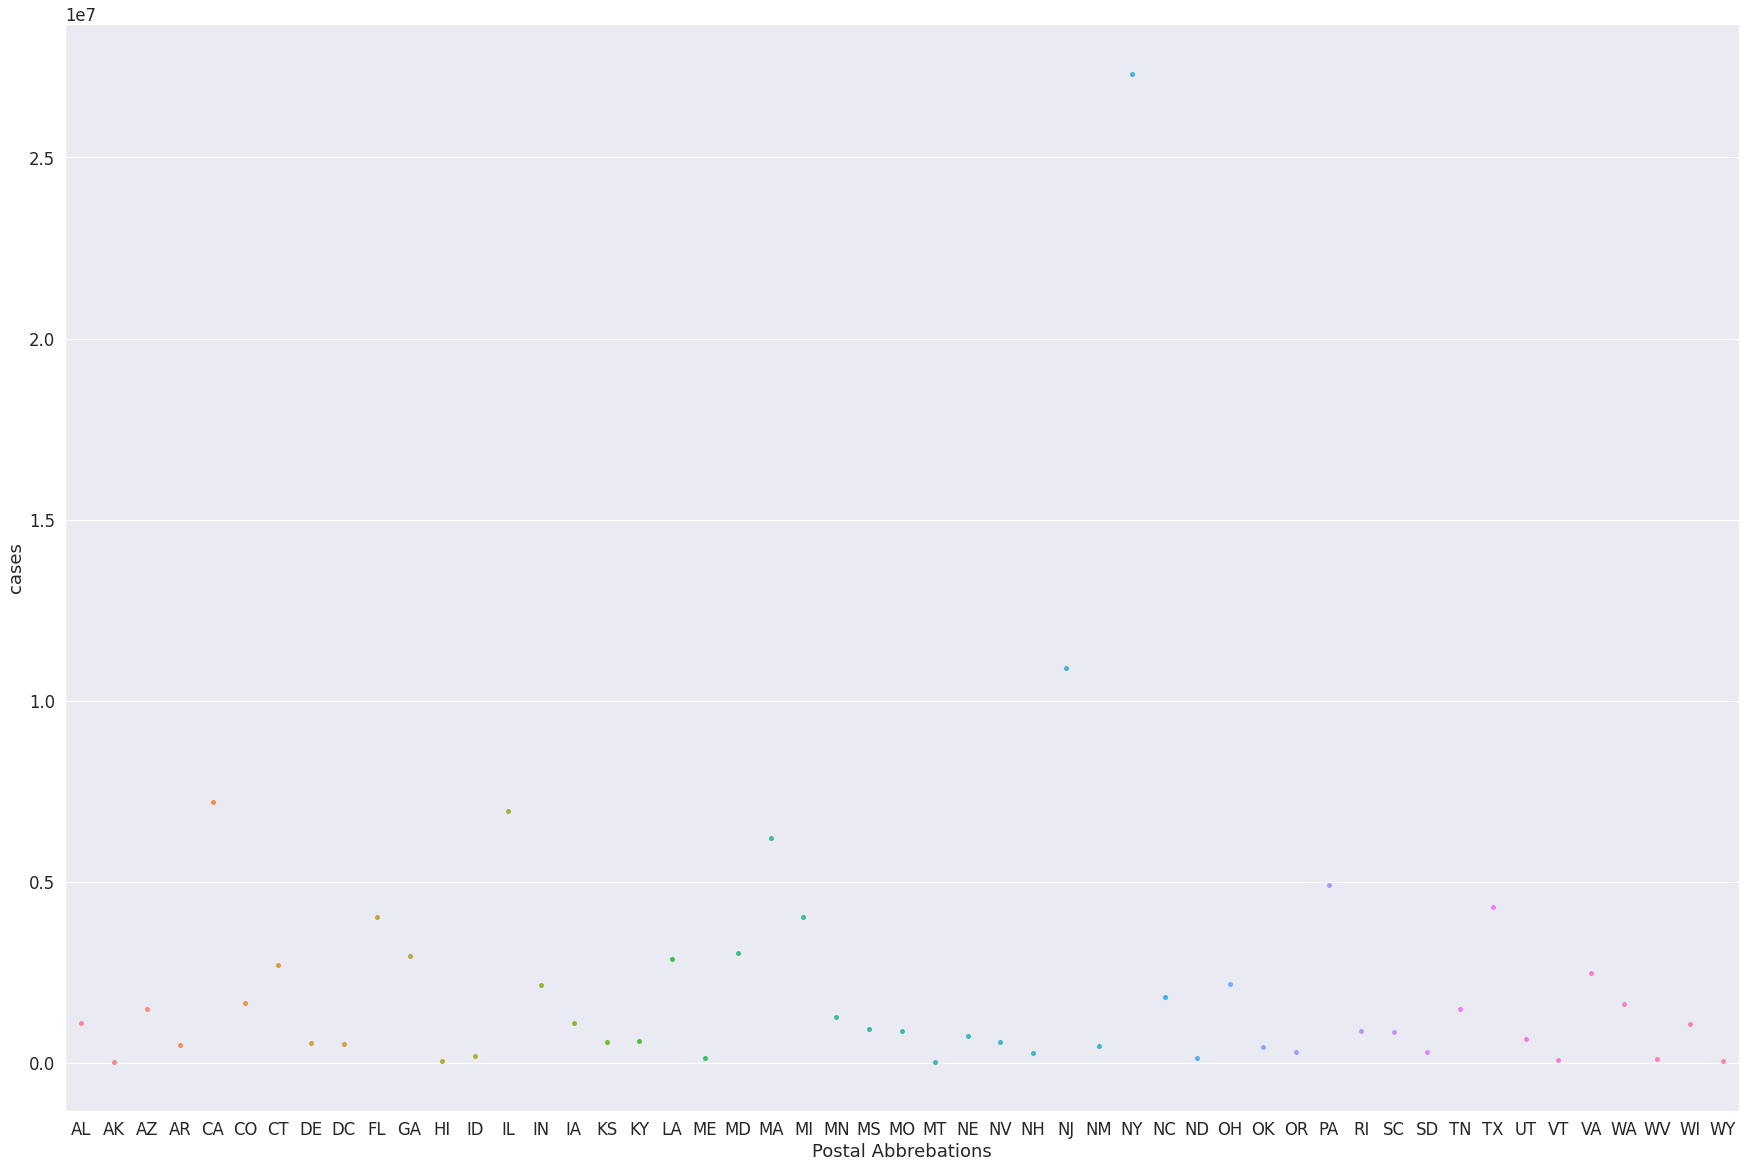

In [60]:
plt.figure(figsize=(30,20))
sns.set(font_scale=1.5)
sns.stripplot(data = mergeframe, x = "Postal Abbrebations", y = "cases", jitter = False, hue= None, dodge = False)
plt.show()

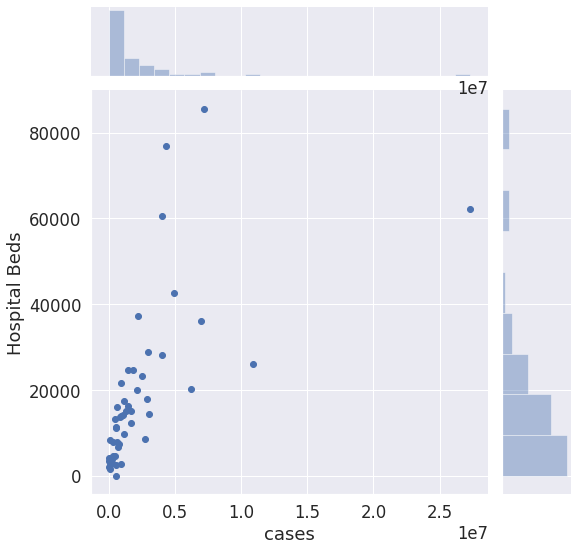

In [61]:
sns.set(font_scale=1.5)
sns.jointplot(data = mergeframe, x = "cases", y = "Hospital Beds", height = 8, kind = "scatter")
plt.show()

Correlation

In [62]:
mergeframe.corr()

,index,fips,cases,deaths,Population,Hospital Beds
index,1.000000,0.548226,-0.015331,0.000103,-0.069690,-0.041077
fips,0.548226,1.000000,0.097874,0.028745,0.397764,0.460290
cases,-0.015331,0.097874,1.000000,0.981530,0.549785,0.621408
deaths,0.000103,0.028745,0.981530,1.000000,0.409194,0.493365
Population,-0.069690,0.397764,0.549785,0.409194,1.000000,0.976506
Hospital Beds,-0.041077,0.460290,0.621408,0.493365,0.976506,1.000000


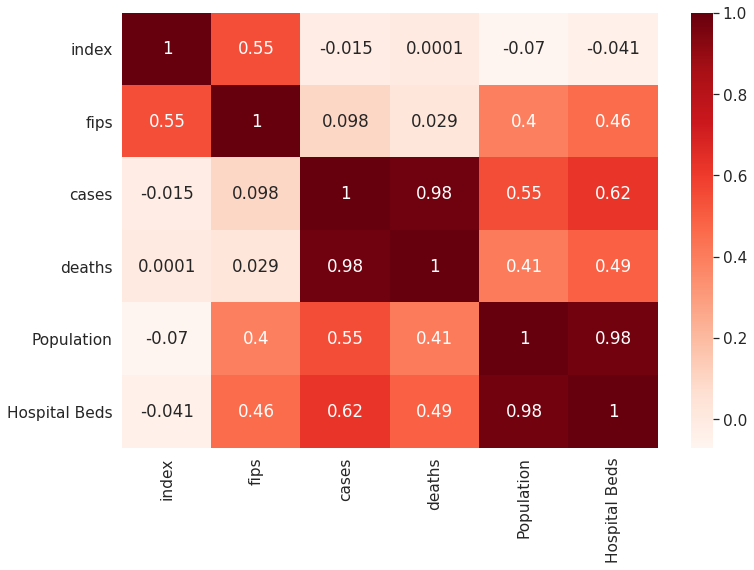

In [63]:
plt.figure(figsize=(12,8))
sns.set(font_scale=1.4)
sns.heatmap(mergeframe.corr(), annot = True, cmap = "Reds")
plt.show()

In [64]:
mergeframe.describe()

,index,fips,cases,deaths,Population,Hospital Beds
count,51.000000,5.100000e+01,5.100000e+01,5.100000e+01,5.100000e+01,51.000000
mean,26.431373,1.579611e+08,2.318099e+06,1.287265e+05,6.422231e+06,18073.803922
std,16.016560,1.655780e+08,4.196440e+06,3.059332e+05,7.372303e+06,18765.672381
min,0.000000,1.221111e+06,3.903600e+04,6.550000e+02,0.000000e+00,0.000000
25%,13.500000,3.826039e+07,4.565125e+05,1.039550e+04,1.789606e+06,4744.500000
50%,26.000000,1.311787e+08,9.439140e+05,3.666800e+04,4.467673e+06,13707.000000
75%,39.500000,2.075039e+08,2.607648e+06,1.263390e+05,7.446805e+06,22422.500000
max,54.000000,9.395725e+08,2.731549e+07,2.049469e+06,3.951222e+07,85604.000000


Histogram

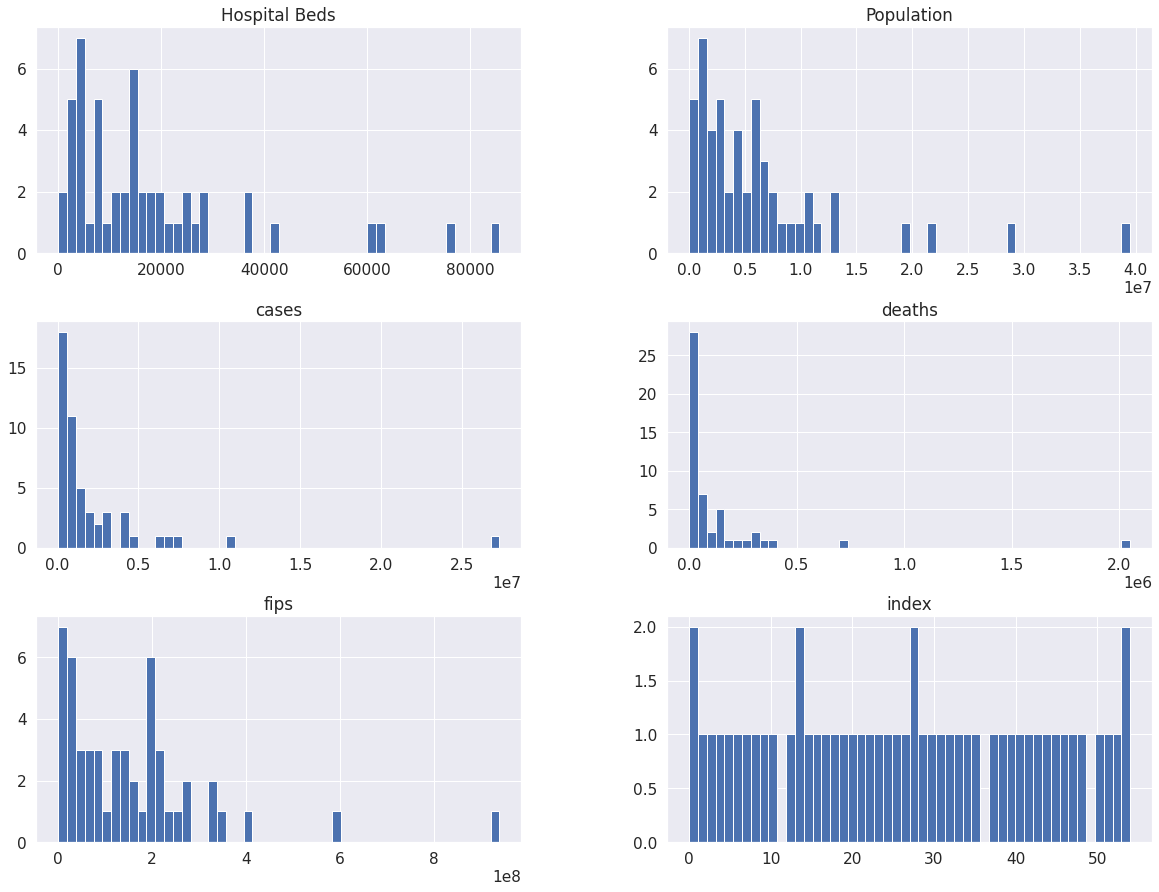

In [65]:
mergeframe.hist(bins=50, figsize=(20,15))
plt.show()

Lets Clean Up Guam

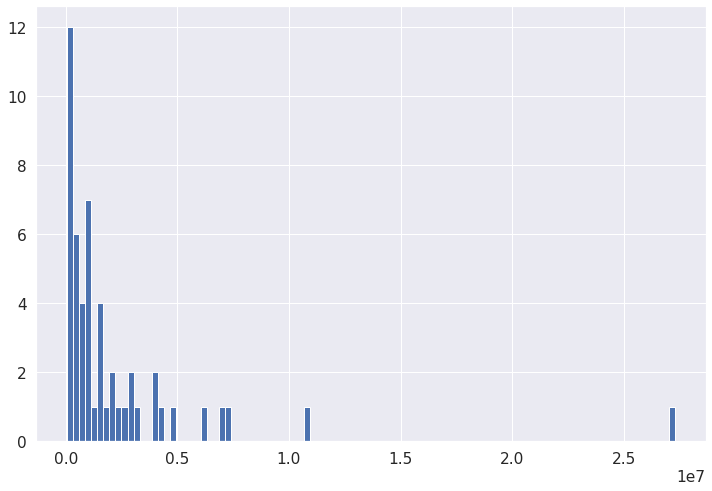

In [66]:
mergeframe.cases.hist(bins = 100, figsize = (12,8))
plt.show()

# Some more cleanups

In [67]:
mergeframe.dtypes

index                     int64
state                    string
fips                    float64
cases                     int64
deaths                    int64
Postal Abbrebations      object
Population                int64
Hospital Beds             int64
_merge                 category
dtype: object

In [68]:
to_drop = ['fips','_merge']
mergeframe.drop(to_drop, inplace=True, axis=1)

In [69]:
mergeframe

,index,state,cases,deaths,Postal Abbrebations,Population,Hospital Beds
0,0,Alabama,1123688,37597,AL,4903185,17537
1,1,Alaska,39036,655,AK,731545,2034
2,2,Arizona,1485084,54407,AZ,7278717,16342
3,3,Arkansas,510888,8768,AR,3017804,11149
4,4,California,7211084,256585,CA,39512223,85604
5,5,Colorado,1668408,87293,CO,5758736,12438
6,6,Connecticut,2723216,234871,CT,3565278,8501
7,7,Delaware,555170,20777,DE,973764,2633
8,8,District of Columbia,529539,26679,DC,0,0
9,9,Florida,4045084,152131,FL,21477737,60521


In [70]:
mergeframe = mergeframe.set_index('state')
mergeframe.head()

,index,cases,deaths,Postal Abbrebations,Population,Hospital Beds
state,,,,,,
Alabama,0,1123688,37597,AL,4903185,17537
Alaska,1,39036,655,AK,731545,2034
Arizona,2,1485084,54407,AZ,7278717,16342
Arkansas,3,510888,8768,AR,3017804,11149
California,4,7211084,256585,CA,39512223,85604


In [71]:
to_drop = ['index']
mergeframe.drop(to_drop, inplace=True, axis=1)

In [72]:
mergeframe

,cases,deaths,Postal Abbrebations,Population,Hospital Beds
state,,,,,
Alabama,1123688,37597,AL,4903185,17537
Alaska,39036,655,AK,731545,2034
Arizona,1485084,54407,AZ,7278717,16342
Arkansas,510888,8768,AR,3017804,11149
California,7211084,256585,CA,39512223,85604
Colorado,1668408,87293,CO,5758736,12438
Connecticut,2723216,234871,CT,3565278,8501
Delaware,555170,20777,DE,973764,2633
District of Columbia,529539,26679,DC,0,0


In [73]:
mergeframe.rename(columns={'Postal Abbrebations':'PA'}, inplace=True)

In [74]:
mergeframe.rename(columns={'Hospital Beds':'Beds'}, inplace=True)

In [75]:
mergeframe

,cases,deaths,PA,Population,Beds
state,,,,,
Alabama,1123688,37597,AL,4903185,17537
Alaska,39036,655,AK,731545,2034
Arizona,1485084,54407,AZ,7278717,16342
Arkansas,510888,8768,AR,3017804,11149
California,7211084,256585,CA,39512223,85604
Colorado,1668408,87293,CO,5758736,12438
Connecticut,2723216,234871,CT,3565278,8501
Delaware,555170,20777,DE,973764,2633
District of Columbia,529539,26679,DC,0,0


In [76]:
mergeframe.dtypes

cases          int64
deaths         int64
PA            object
Population     int64
Beds           int64
dtype: object

Reorder the dataset

In [77]:
mergeframe = mergeframe[['PA','Population','Beds','cases','deaths']]

In [78]:
mergeframe

,PA,Population,Beds,cases,deaths
state,,,,,
Alabama,AL,4903185,17537,1123688,37597
Alaska,AK,731545,2034,39036,655
Arizona,AZ,7278717,16342,1485084,54407
Arkansas,AR,3017804,11149,510888,8768
California,CA,39512223,85604,7211084,256585
Colorado,CO,5758736,12438,1668408,87293
Connecticut,CT,3565278,8501,2723216,234871
Delaware,DE,973764,2633,555170,20777
District of Columbia,DC,0,0,529539,26679


# Visualize again

**Features**


1.   State Name
2.   Postal Name
3.   Population
4.   Beds
5.   cases
6.   Deaths 





In [79]:
mergeframe.describe()

,Population,Beds,cases,deaths
count,5.100000e+01,51.000000,5.100000e+01,5.100000e+01
mean,6.422231e+06,18073.803922,2.318099e+06,1.287265e+05
std,7.372303e+06,18765.672381,4.196440e+06,3.059332e+05
min,0.000000e+00,0.000000,3.903600e+04,6.550000e+02
25%,1.789606e+06,4744.500000,4.565125e+05,1.039550e+04
50%,4.467673e+06,13707.000000,9.439140e+05,3.666800e+04
75%,7.446805e+06,22422.500000,2.607648e+06,1.263390e+05
max,3.951222e+07,85604.000000,2.731549e+07,2.049469e+06


Beds per cases

In [80]:
mergeframe["beds_per_cases"] = mergeframe.Beds.div(mergeframe.cases)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [81]:
mergeframe.beds_per_cases.nlargest(10)

state
Montana          0.097152
West Virginia    0.066008
Hawaii           0.064417
Alaska           0.052106
Wyoming          0.040119
Oklahoma         0.029606
Maine            0.026346
Kentucky         0.025843
Oregon           0.025805
North Dakota     0.025333
Name: beds_per_cases, dtype: float64

In [82]:
mergeframe.beds_per_cases.nsmallest(10)

state
District of Columbia    0.000000
New York                0.002278
New Jersey              0.002384
Rhode Island            0.003059
Connecticut             0.003122
Massachusetts           0.003249
Maryland                0.004694
Delaware                0.004743
Illinois                0.005177
Louisiana               0.006257
Name: beds_per_cases, dtype: float64

Cases per million people

In [90]:
mergeframe["cases_per_million_people"] = mergeframe.cases.div(mergeframe.Population/1000000)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [91]:
mergeframe.cases_per_million_people.nlargest(10)

state
District of Columbia             inf
New York                1.404138e+06
New Jersey              1.227863e+06
Massachusetts           9.019606e+05
Rhode Island            8.506873e+05
Connecticut             7.638159e+05
Louisiana               6.175862e+05
Delaware                5.701279e+05
Illinois                5.498521e+05
Maryland                5.056341e+05
Name: cases_per_million_people, dtype: float64

In [92]:
mergeframe.cases_per_million_people.nsmallest(10)

state
Hawaii            38012.616960
Montana           39919.421994
Alaska            53361.037257
West Virginia     71033.793545
Oregon            72584.658550
Wyoming          105645.009408
Maine            107694.322027
Oklahoma         112274.262308
Idaho            118792.545319
Vermont          127521.478744
Name: cases_per_million_people, dtype: float64

In [94]:
mergeframe.round(3)

,PA,Population,Beds,cases,deaths,beds_per_cases,cases_per_million_people
state,,,,,,,
Alabama,AL,4903185,17537,1123688,37597,0.016,229175.118
Alaska,AK,731545,2034,39036,655,0.052,53361.037
Arizona,AZ,7278717,16342,1485084,54407,0.011,204031.013
Arkansas,AR,3017804,11149,510888,8768,0.022,169291.312
California,CA,39512223,85604,7211084,256585,0.012,182502.614
Colorado,CO,5758736,12438,1668408,87293,0.007,289717.744
Connecticut,CT,3565278,8501,2723216,234871,0.003,763815.893
Delaware,DE,973764,2633,555170,20777,0.005,570127.875
District of Columbia,DC,0,0,529539,26679,0.000,inf
